In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv(r"C:\Users\hp\Downloads\Titanic-Dataset.csv", index_col = "PassengerId")

In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [6]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [9]:
titanic = titanic.drop_duplicates()

In [10]:
titanic = titanic.drop(columns=['Ticket','Cabin'])

In [11]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S


In [14]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2


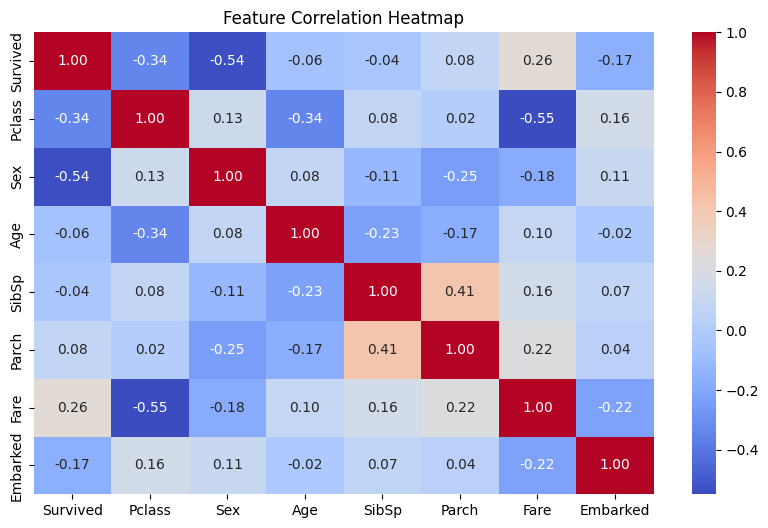

In [15]:
num_cols = titanic.select_dtypes(include=['number'])  

corr_matrix = num_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

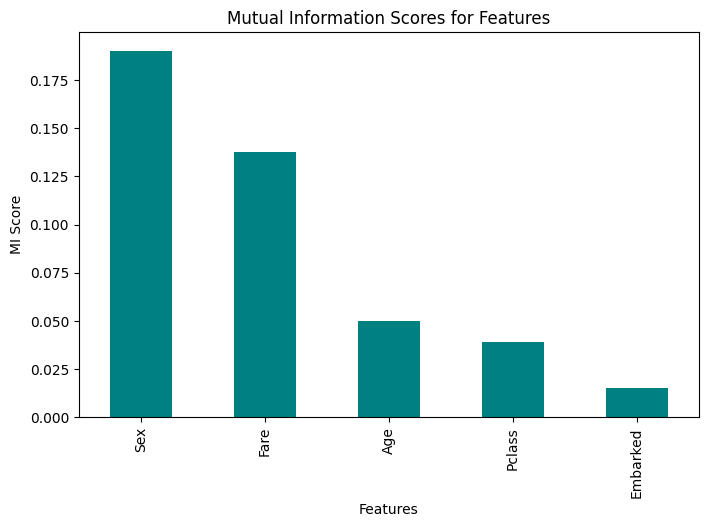

In [16]:
from sklearn.feature_selection import mutual_info_classif

# Select numerical and categorical features
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical
y = titanic['Survived']

# Compute mutual information
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
mi_scores.plot(kind='bar', color='teal')
plt.title("Mutual Information Scores for Features")
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.show()

In [15]:
# Potential Feature Selection Decisions
# Keep Sex, Pclass, and Fare as they show strong correlation with survival and High MI scores
# Consider dropping Age as it has a very weak correlation (-0.06) with survival.
# SibSp & Parch might be combined into a single "Family Size" feature to simplify the dataset.
# Consider dropping: Age, Embarked
# Potential Feature Engineering: Combine Fare and Pclass into a new feature like "Wealth Index" to better represent socioeconomic status.

In [17]:
titanic = titanic.drop(columns=['Age','Embarked'])

In [18]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1  # Adding 1 to include the passenger themselves
titanic['Wealth_Index'] = titanic['Fare'] / (titanic['Pclass'])

In [20]:
titanic = titanic.drop(columns = ['SibSp', 'Parch'])

In [23]:
titanic.describe()

,Survived,Pclass,Sex,Fare,Family_Size,Wealth_Index
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.768745,1.904602,0.911399
std,0.486592,0.836071,0.477990,2.152200,1.613459,2.494715
min,0.000000,1.000000,0.000000,-0.626005,1.000000,-0.307911
25%,0.000000,2.000000,0.000000,-0.283409,1.000000,-0.179310
50%,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,0.716591,2.000000,0.820690
max,1.000000,3.000000,1.000000,21.562738,11.000000,24.633065


In [22]:
robust_scaler = RobustScaler()  
titanic[['Wealth_Index']] = robust_scaler.fit_transform(titanic[['Wealth_Index']])  
titanic[['Fare']] = robust_scaler.fit_transform(titanic[['Fare']])  

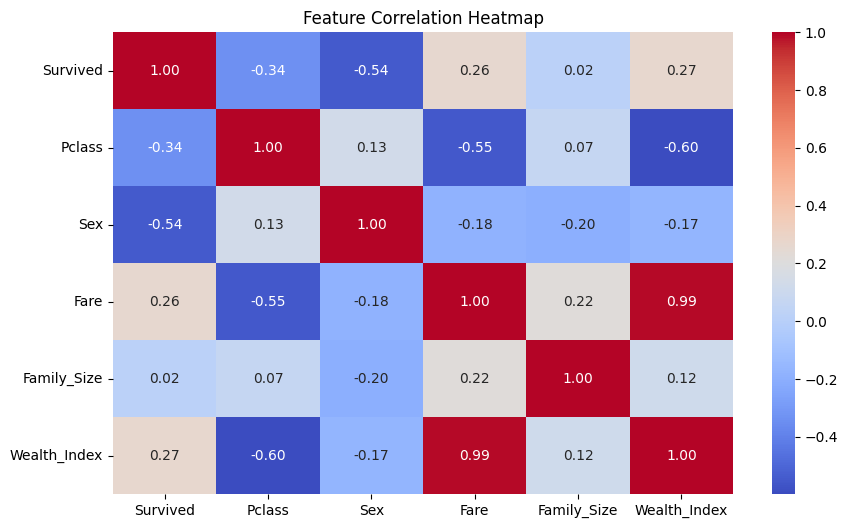

In [24]:
num_cols = titanic.select_dtypes(include=['number'])  

corr_matrix = num_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

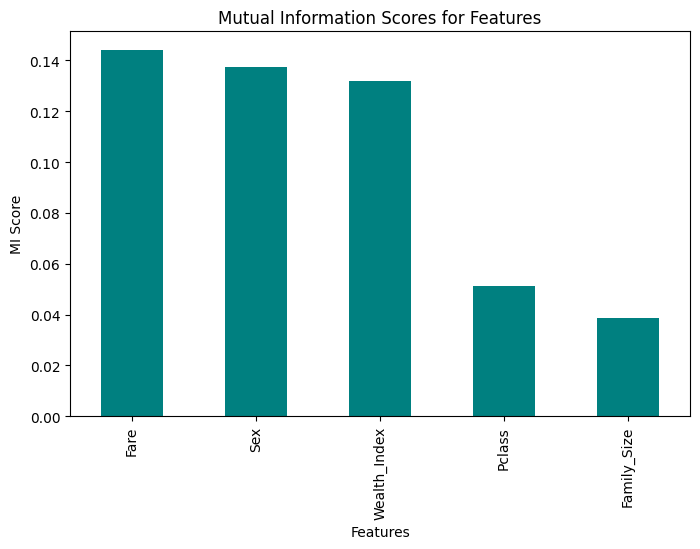

In [25]:
X = titanic[['Pclass', 'Sex', 'Fare', 'Family_Size', 'Wealth_Index']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical
y = titanic['Survived']

# Compute mutual information
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
mi_scores.plot(kind='bar', color='teal')
plt.title("Mutual Information Scores for Features")
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.show()

In [26]:
# Mutual Information Scores for Features:

#     Sex remains the most important feature for predicting survival.
#     Wealth_Index (a combination of Fare and Pclass) has a high MI score, confirming that socioeconomic status plays a strong role in survival probability.
#     Family_Size and Pclass have lower MI scores, suggesting they are less informative but still contribute to the prediction.

# Feature Correlation Heatmap:

#     Wealth_Index has a strong negative correlation (-0.60) with Pclass, which makes sense as lower class (higher Pclass value) corresponds to lower fares.
#     Wealth_Index is highly correlated (0.99) with Fare, suggesting that Fare is still the dominant factor in this new feature.

# Key Takeaways:

#     Wealth_Index is a strong feature, but its high correlation with Fare suggests it may be redundant if both are kept.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
features = ['Wealth_Index', 'Family_Size', 'Sex', 'Pclass']
X = titanic[features]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predictions and evaluation
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[88 17]
 [21 53]]


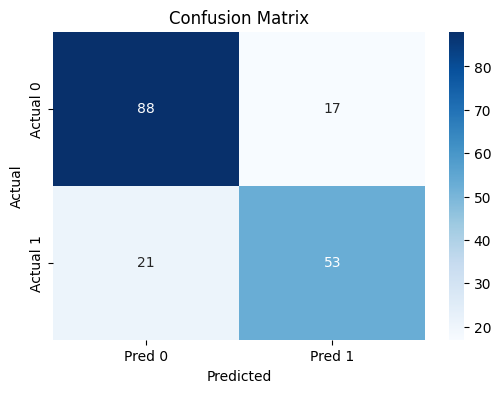

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

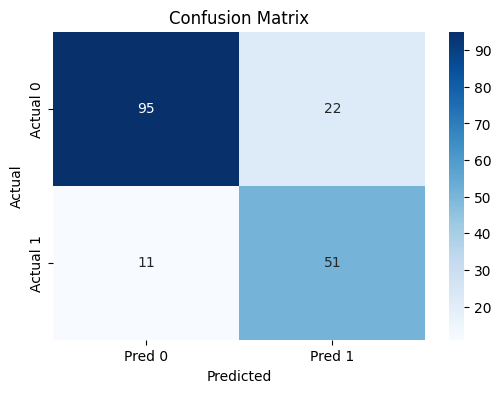

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predictions and evaluation
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

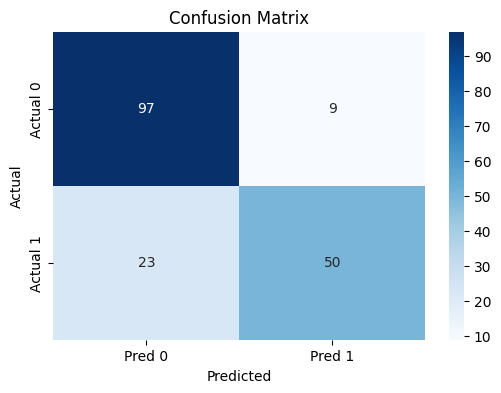

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predictions and evaluation
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# As we change the random state the accuracy increases as shown in the confusion matrix